In [40]:
import emission.storage.timeseries.aggregate_timeseries as estag
import emission.storage.timeseries.timequery as estt
import arrow
import emission.core.get_database as edb
from emission.core.wrapper.user import User
import numpy as np

In [ ]:
agts = estag.AggregateTimeSeries()
sep_dec_tq_data_ts = estt.TimeQuery("data.ts", arrow.get("2018-3-28").timestamp, arrow.now().timestamp)
client_nav_events_df = agts.get_data_df("stats/client_nav_event", time_query=sep_dec_tq_data_ts)
client_nav_events_df.head()

In [4]:
app_launched_events = client_nav_events_df[client_nav_events_df.name == "opened_app"]
suggestion_events = client_nav_events_df[client_nav_events_df.name == "tapped_suggestion"]

In [ ]:
information = {}
for i in range(len(app_launched_events)):
    uuid = app_launched_events[i]['user_id']
    try:
        client = edb.get_profile_db().find_one({"user_id": uuid})['client']
        if client == 'urap-2017-information':
            information[uuid] = 0
    except:
        continue
for i in range(len(suggestion_events)):
    uuid = suggestion_events[i]['user_id']
    try:
        client = edb.get_profile_db().find_one({"user_id": uuid})['client']
        if client == 'urap-2017-information':
            information[uuid] = information.get(uuid, 0) + 1
    except:
        continue
print(len(information))
print(information)

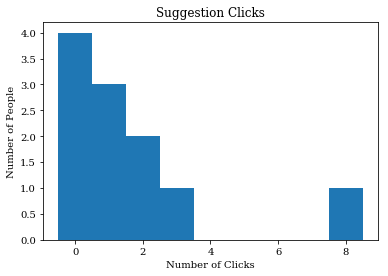

In [45]:
import matplotlib.pyplot as plt
import matplotlib
plt.hist(x=list(information.values()), bins=np.arange(9.5) - 0.5)
plt.title("Suggestion Clicks")
plt.xlabel("Number of Clicks")
plt.ylabel("Number of People")
plt.show()